## sentiment analysis - TFIDF feature weighting with RNN classification

`Term Weighting = TFIDF`

# Libraries

In [2]:
import pandas as pd
import numpy as np
import numpy as np 
import re #RegEx
import itertools
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer #Count Vector Space Model
from sklearn import metrics #Matrix Builder
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import KFold #Import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Load Dataset

_`preprocessed dataset`_

In [3]:
df = pd.read_csv('D:\kuliah\THE ONLY TA THINGS\DATA\cleaned_data_review.csv')
df.head()

,content,stemming,label
0,bagus,['bagus'],-1.0
1,Tampa tik tok hidub terasa sepi🤣🤣,"['tampa', 'hidub', 'sepi', '', '']",1.0
2,Goid,['goid'],1.0
3,sangat bagus,['bagus'],1.0
4,P im ZZ@@@,"['im', 'zz']",1.0


In [4]:
df = df.dropna()
df = df.reset_index(drop=True)

In [5]:
df.isnull().sum()

content     0
stemming    0
label       0
dtype: int64

_`total label value`_

In [6]:
df['label'].value_counts()

 1.0    196
-1.0     76
 0.0      9
Name: label, dtype: int64

# TFIDF for feature weighting

In [7]:
tfidf_vect = TfidfVectorizer(use_idf = True ,max_features = 5000)
x = tfidf_vect.fit(df['stemming'])
TFIDF = x.transform(df['stemming'])

In [8]:
print(TFIDF)


  (0, 47)	1.0
  (1, 470)	0.5773502691896258
  (1, 432)	0.5773502691896258
  (1, 192)	0.5773502691896258
  (2, 175)	1.0
  (3, 47)	1.0
  (4, 534)	0.7494185269080749
  (4, 204)	0.6620965726591033
  (5, 44)	1.0
  (6, 532)	0.3551453597160012
  (6, 489)	0.18778267417527644
  (6, 204)	0.3137639610190629
  (6, 197)	0.3551453597160012
  (6, 182)	0.7102907194320024
  (6, 30)	0.330938793250901
  (7, 340)	1.0
  (8, 243)	1.0
  (10, 516)	0.3479326685746
  (10, 497)	0.2482249036101164
  (10, 448)	0.3479326685746
  (10, 397)	0.3479326685746
  (10, 266)	0.3479326685746
  (10, 64)	0.2943404097835192
  (10, 13)	0.3479326685746
  (10, 10)	0.4964498072202328
  :	:
  (278, 498)	0.41441396520275753
  (278, 489)	0.11757425268417351
  (278, 427)	0.22236316766841754
  (278, 408)	0.22236316766841754
  (278, 338)	0.19645349816250246
  (278, 309)	0.22236316766841754
  (278, 274)	0.20720698260137876
  (278, 256)	0.22236316766841754
  (278, 240)	0.22236316766841754
  (278, 218)	0.22236316766841754
  (278, 178)	0.196

_`Seperate label to its own array`_

In [9]:
label = []
for data in df['label']:
    label.append(data)
kolom = label.pop

In [10]:
def Average(lst):
    return sum(lst) / len(lst)

### KFold Cross Validation

In [11]:
folds = range(2,11)
for k in folds:
    accuracy=[]
    kFoldCrossValidation = KFold(n_splits=k, random_state=0, shuffle = True)
    for train, test in kFoldCrossValidation.split(TFIDF, label):
        trainData, testData = TFIDF[train], TFIDF[test]
        label = np.array(label)
        trainData2, testData2 = label[train], label[test]
        
        SVM = SVC(kernel = 'linear', C = 1)
        model = SVM.fit(trainData, trainData2)
        prediksi = model.predict(testData)
        
        accuracy.append(accuracy_score(testData2, prediksi))
        
    print('Folds : %d | Accuracy : %.3f | Max, Min : %.3f, %.3f' 
          % (k, Average(accuracy), max(accuracy), min(accuracy)))
    print("\n")

Folds : 2 | Accuracy : 0.719 | Max, Min : 0.738, 0.700


Folds : 3 | Accuracy : 0.719 | Max, Min : 0.731, 0.702


Folds : 4 | Accuracy : 0.708 | Max, Min : 0.729, 0.657


Folds : 5 | Accuracy : 0.708 | Max, Min : 0.732, 0.661


Folds : 6 | Accuracy : 0.701 | Max, Min : 0.745, 0.660


Folds : 7 | Accuracy : 0.715 | Max, Min : 0.825, 0.600


Folds : 8 | Accuracy : 0.719 | Max, Min : 0.771, 0.629


Folds : 9 | Accuracy : 0.708 | Max, Min : 0.806, 0.645


Folds : 10 | Accuracy : 0.719 | Max, Min : 0.786, 0.643




### Implementing KFold with chosen K value

In [15]:
#K-Fold Cross Validation will iterate k times
kFoldCrossValidation = KFold(n_splits=7, random_state=0, shuffle = True)

actual_classes = np.empty([0], dtype=int)
predicted_classes = np.empty([0], dtype=int)
    
for train, test in kFoldCrossValidation.split(TFIDF, label):
    #Initiate Train and Test Data then transform to TFIDF value. Then copy to new Train and Test variables. 
    trainData, testData = TFIDF[train], TFIDF[test]
    label = np.array(label)
    trainData2, testData2 = label[train], label[test]
    
    SVM = SVC(kernel = 'linear', C = 1)
    model = SVM.fit(trainData, trainData2)
    prediksi = model.predict(testData)
    
    actual_classes = np.append(actual_classes, label[test])
    predicted_classes = np.append(predicted_classes, model.predict(testData))
   
    accuracy.append(accuracy_score(testData2, prediksi))

conf_matrix = metrics.confusion_matrix(actual_classes, predicted_classes)
svm_accuracy = metrics.accuracy_score(actual_classes, predicted_classes)
precision = metrics.precision_score(actual_classes, predicted_classes, average='macro')
recall = metrics.recall_score(actual_classes, predicted_classes, average='macro')
f1score = metrics.f1_score(actual_classes, predicted_classes, average='macro')

print("\nConfusion Matrix: \n", conf_matrix)
print("------------------------------------------------------------")
print(classification_report(actual_classes, predicted_classes, digits = 4,
                           target_names = ['Positive', 'Negative', 'Neutral']))
print("------------------------------------------------------------")
print("\nAccuracy : %.3f, Precission : %.3f, Recall : %.3f, F1 Score : %.3f" %(svm_accuracy, precision, recall, f1score))


Confusion Matrix: 
 [[  9   0  67]
 [  1   0   8]
 [  4   0 192]]
------------------------------------------------------------
              precision    recall  f1-score   support

    Positive     0.6429    0.1184    0.2000        76
    Negative     0.0000    0.0000    0.0000         9
     Neutral     0.7191    0.9796    0.8294       196

    accuracy                         0.7153       281
   macro avg     0.4540    0.3660    0.3431       281
weighted avg     0.6754    0.7153    0.6326       281

------------------------------------------------------------

Accuracy : 0.715, Precission : 0.454, Recall : 0.366, F1 Score : 0.343


c:\Users\Madluke\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Madluke\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Madluke\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifi

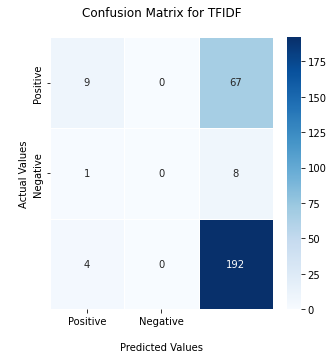

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (5, 5))
ax = sns.heatmap(conf_matrix, cmap = 'Blues',
                    linecolor = 'white',
                    linewidth = 1,
                    annot = True,
                    fmt = '',
                    xticklabels = ['Positive', 'Negative'],
                    yticklabels = ['Positive', 'Negative'])
ax.set_title("Confusion Matrix for TFIDF\n")
ax.set_xlabel("\nPredicted Values")
ax.set_ylabel("\nActual Values")
plt.show()